### Problem 1: Linear Regression


### You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.


Data Dictionary:

Variable Name	Description

Carat	:        Carat weight of the cubic zirconia.

Cut	     :       Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium,                     Ideal.

Color 	  :      Colour of the cubic zirconia.With D being the best and J the worst.

Clarity	   :     cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL                 = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3

Depth	    :    The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.

Table	    :    The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

Price	     :   the Price of the cubic zirconia.

X	       :     Length of the cubic zirconia in mm.

Y	        :    Width of the cubic zirconia in mm.

Z	        :    Height of the cubic zirconia in mm.

Dataset for Problem 1: cubic_zirconia.csv

In [1474]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

### Importing data

In [1475]:
dfzir= pd.read_csv('cubic_zirconia-1.csv')


###  EDA

In [1476]:
dfzir.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [1477]:
# drop the unnamed column as it is useless for the model
dfzir = dfzir.drop('Unnamed: 0', axis=1)

In [1478]:
dfzir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [1479]:
dfzir.shape

(26967, 10)

In [1480]:
dfzir.describe(include="all")

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967,26967,26967,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,NaN,NaN,NaN,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


### unique values for categorical variables

In [1481]:
for column in dfzir.columns:
    if dfzir[column].dtype == 'object':
        print(column.upper(),': ',dfzir[column].nunique())
        print(dfzir[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




### Converting categorical to dummy variables

In [1482]:
dfzir = pd.get_dummies(dfzir, columns=['cut','color','clarity'],drop_first=True)

In [1483]:
dfzir.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [1484]:
# Are there any missing values ?
dfzir.isnull().sum()

carat              0
depth            697
table              0
x                  0
y                  0
z                  0
price              0
cut_Good           0
cut_Ideal          0
cut_Premium        0
cut_Very Good      0
color_E            0
color_F            0
color_G            0
color_H            0
color_I            0
color_J            0
clarity_IF         0
clarity_SI1        0
clarity_SI2        0
clarity_VS1        0
clarity_VS2        0
clarity_VVS1       0
clarity_VVS2       0
dtype: int64

### Imputing missing values

In [1485]:
for column in dfzir.columns:
    if dfzir[column].dtype != 'object':
        mean = dfzir[column].mean()
        dfzir[column] = dfzir[column].fillna(mean)    
        
dfzir.isnull().sum()        

carat            0
depth            0
table            0
x                0
y                0
z                0
price            0
cut_Good         0
cut_Ideal        0
cut_Premium      0
cut_Very Good    0
color_E          0
color_F          0
color_G          0
color_H          0
color_I          0
color_J          0
clarity_IF       0
clarity_SI1      0
clarity_SI2      0
clarity_VS1      0
clarity_VS2      0
clarity_VVS1     0
clarity_VVS2     0
dtype: int64

In [1486]:
dfzir.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [1487]:
dfzir.describe()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,...,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115,0.090518,0.401083,0.255831,...,0.152112,0.102755,0.053510,0.033152,0.243668,0.169652,0.151778,0.226165,0.068194,0.093855
std,0.477745,1.394481,2.232068,1.128516,1.166058,0.720624,4024.864666,0.286928,0.490127,0.436335,...,0.359136,0.303645,0.225052,0.179036,0.429303,0.375334,0.358812,0.418355,0.252084,0.291633
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking for duplicates

In [1488]:
# Are there any duplicates ?
dups = dfzir.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 34


In [1489]:
print('Before',dfzir.shape)
dfzir.drop_duplicates(inplace=True) 
print('After',dfzir.shape)

Before (26967, 24)
After (26933, 24)


In [1490]:
dups = dfzir.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### Correlation Plot

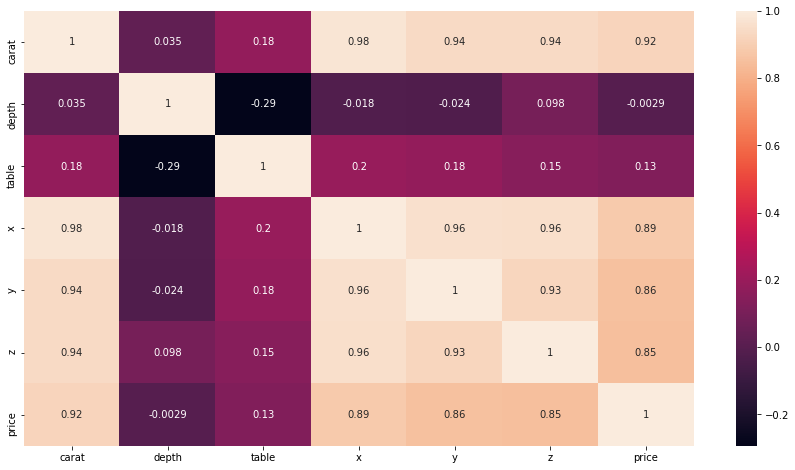

In [1491]:
sns.heatmap(dfzir.iloc[:, 0:7].corr(),annot=True)
plt.show()

The variables carat, x, y, z, price are having high correlation with each other.

In [1492]:
dfzir.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [1493]:
dfzir.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          26933 non-null  float64
 1   depth          26933 non-null  float64
 2   table          26933 non-null  float64
 3   x              26933 non-null  float64
 4   y              26933 non-null  float64
 5   z              26933 non-null  float64
 6   price          26933 non-null  int64  
 7   cut_Good       26933 non-null  uint8  
 8   cut_Ideal      26933 non-null  uint8  
 9   cut_Premium    26933 non-null  uint8  
 10  cut_Very Good  26933 non-null  uint8  
 11  color_E        26933 non-null  uint8  
 12  color_F        26933 non-null  uint8  
 13  color_G        26933 non-null  uint8  
 14  color_H        26933 non-null  uint8  
 15  color_I        26933 non-null  uint8  
 16  color_J        26933 non-null  uint8  
 17  clarity_IF     26933 non-null  uint8  
 18  clarit

### Outlier Checks

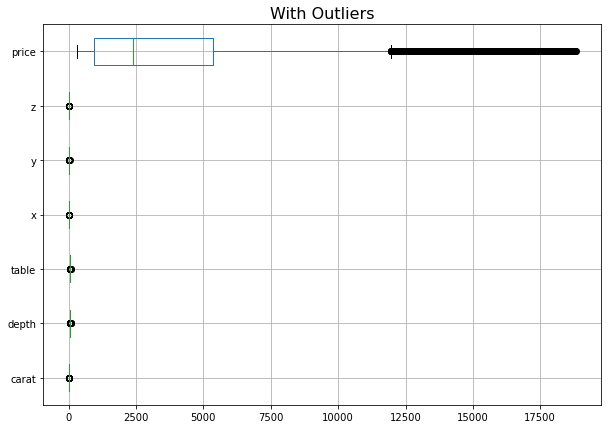

In [1494]:
# construct box plot for continuous variables
cont=dfzir.dtypes[(dfzir.dtypes!='uint8')].index
plt.figure(figsize=(10,7))
dfzir[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [1495]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [1496]:
for column in dfzir[cont].columns:
    lr,ur=remove_outlier(dfzir[column])
    dfzir[column]=np.where(dfzir[column]>ur,ur,dfzir[column])
    dfzir[column]=np.where(dfzir[column]<lr,lr,dfzir[column])

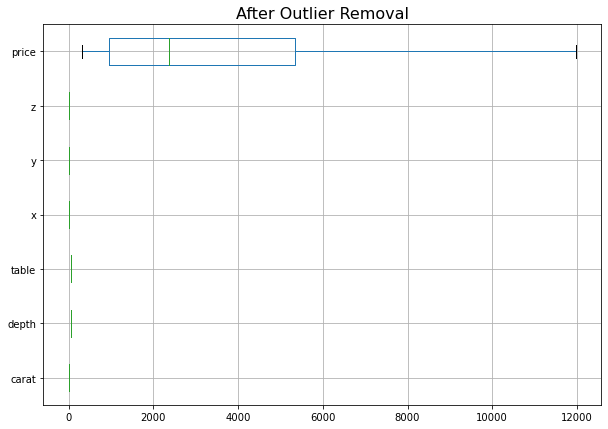

In [1497]:
plt.figure(figsize=(10,7))
dfzir[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

### Data Distribution

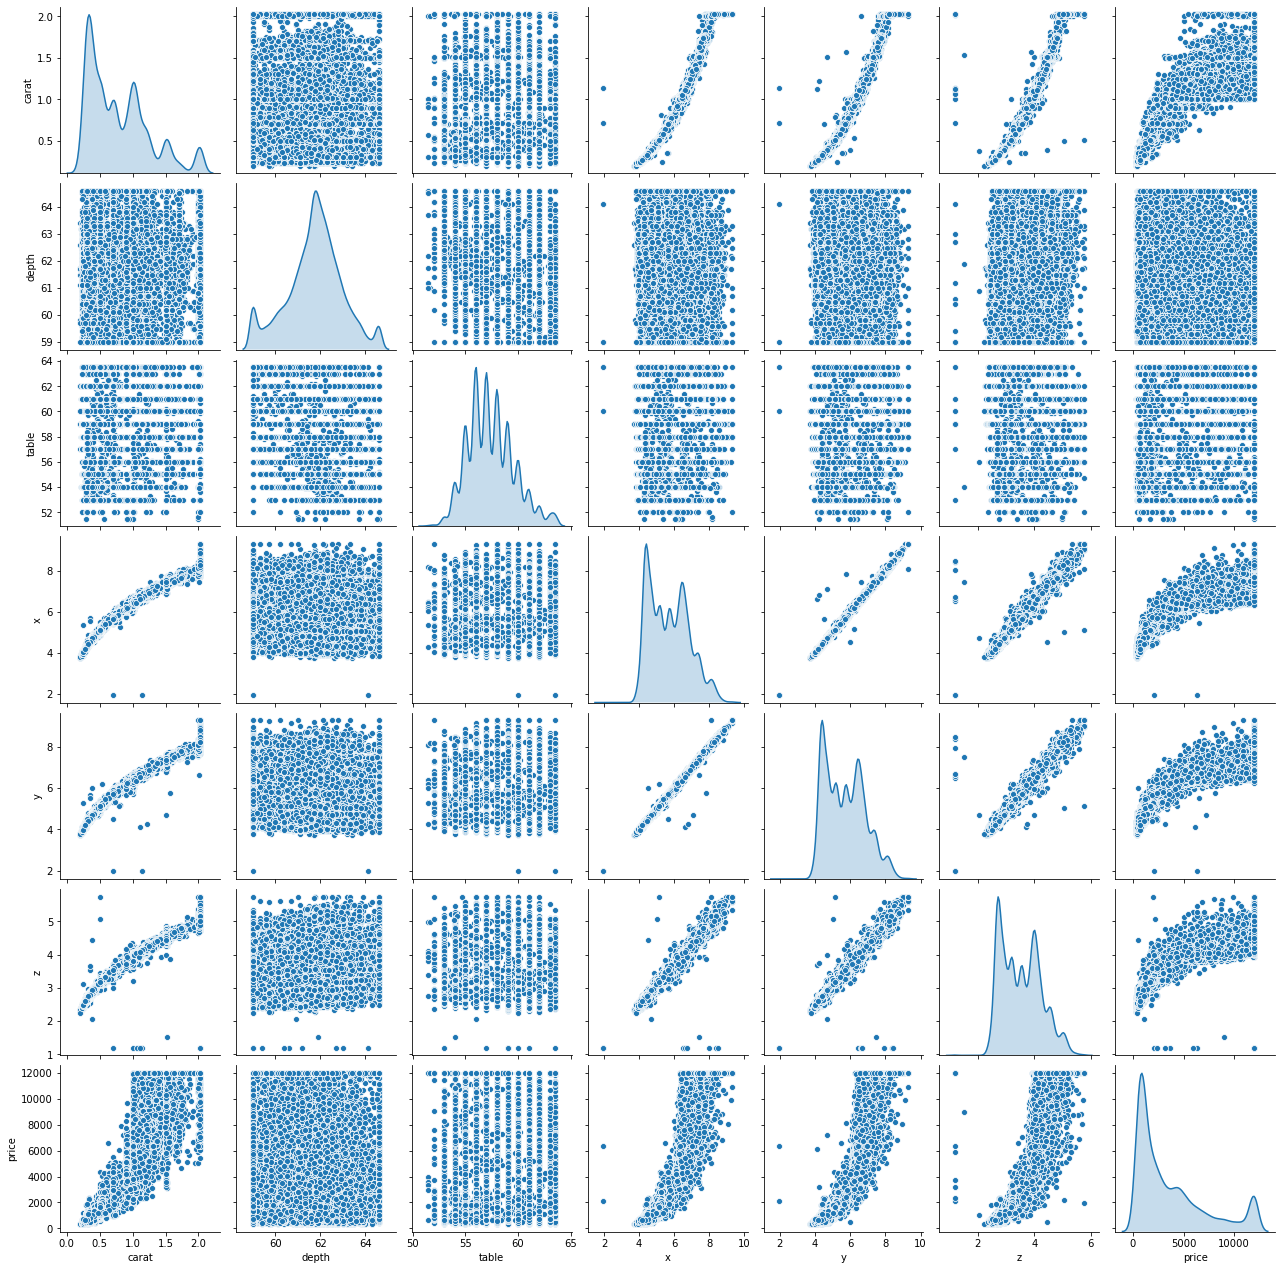

In [1498]:
dfzir_attr = (dfzir[cont])
sns.pairplot(dfzir_attr, diag_kind='kde')  
plt.show()

### Train-Test Split

In [1499]:
# Copy all the predictor variables into X dataframe
X = dfzir.drop('price', axis=1)

# Copy target into the y dataframe. 
y = dfzir[['price']]

In [1500]:
X.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [1501]:
y.head()

,price
0,499.0
1,984.0
2,6289.0
3,1082.0
4,779.0


In [1502]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

### Linear Regression Model

In [1503]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [1504]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 9126.93571059201
The coefficient for depth is -15.01439648979687
The coefficient for table is -18.585758559242056
The coefficient for x is -1190.2766851747615
The coefficient for y is 837.3564745735155
The coefficient for z is -163.63843722668042
The coefficient for cut_Good is 481.8131839939374
The coefficient for cut_Ideal is 714.6461270144671
The coefficient for cut_Premium is 674.7717434404603
The coefficient for cut_Very Good is 606.8965827395988
The coefficient for color_E is -181.90972759472132
The coefficient for color_F is -256.81260630027714
The coefficient for color_G is -429.38111105932967
The coefficient for color_H is -855.9905503631984
The coefficient for color_I is -1323.9291307344272
The coefficient for color_J is -1928.0517124934504
The coefficient for clarity_IF is 4004.0105702429014
The coefficient for clarity_SI1 is 2519.9221438718114
The coefficient for clarity_SI2 is 1684.460710379163
The coefficient for clarity_VS1 is 3342.5738468842

In [1505]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1846.1195153134286


In [1506]:
# R square on training data
regression_model.score(X_train, y_train)

0.9402045565696221

In [1507]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9419074462493611

In [1508]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

847.4553059754451

In [1509]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_test, y_test).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

833.4194412132213

### Linear Regression using statsmodels

In [1510]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
22114,0.34,62.4,60.0,4.41,4.44,2.76,0,0,0,1,...,0,0,0,0,0,0,1,0,0,537.0
2275,0.30,61.2,55.0,4.35,4.31,2.65,0,1,0,0,...,0,0,0,0,0,0,1,0,0,844.0
19183,0.50,62.5,57.0,5.09,5.05,3.17,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1240.0
5030,1.10,63.3,56.0,6.53,6.58,4.15,1,0,0,0,...,0,0,0,0,1,0,0,0,0,4065.0
25414,1.02,61.1,62.0,6.54,6.49,3.98,0,0,1,0,...,0,0,0,0,1,0,0,0,0,4057.0


In [1511]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [1512]:
data_train.rename(columns = {"cut_Very Good": "cut_VeryGood"},inplace = True)
data_test.rename(columns = {"cut_Very Good": "cut_VeryGood"},inplace = True)

In [1513]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_VeryGood', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [1514]:
import statsmodels.formula.api as smf
lm1= smf.ols(formula= 'price ~ carat+depth+table+x+y+z+cut_Good+cut_Ideal+cut_Premium+cut_VeryGood+color_E+color_F+color_G+color_H+color_I+color_J+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+clarity_VVS2', data= data_train).fit()
lm1.params

Intercept      -1846.119515
carat           9126.935711
depth            -15.014396
table            -18.585759
x              -1190.276685
y                837.356475
z               -163.638437
cut_Good         481.813184
cut_Ideal        714.646127
cut_Premium      674.771743
cut_VeryGood     606.896583
color_E         -181.909728
color_F         -256.812606
color_G         -429.381111
color_H         -855.990550
color_I        -1323.929131
color_J        -1928.051712
clarity_IF      4004.010570
clarity_SI1     2519.922144
clarity_SI2     1684.460710
clarity_VS1     3342.573847
clarity_VS2     3039.931687
clarity_VVS1    3772.297788
clarity_VVS2    3757.778854
dtype: float64

In [1515]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 1.287e+04
Date:                Sat, 13 Feb 2021   Prob (F-statistic):               0.00
Time:                        13:26:05   Log-Likelihood:            -1.5386e+05
No. Observations:               18853   AIC:                         3.078e+05
Df Residuals:                   18829   BIC:                         3.080e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1846.1195    661.115     -2.792   

In [1516]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [1517]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

847.4553059754471

In [1518]:
np.sqrt(lm1.mse_resid) #another way

847.9952297717472

In [1519]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

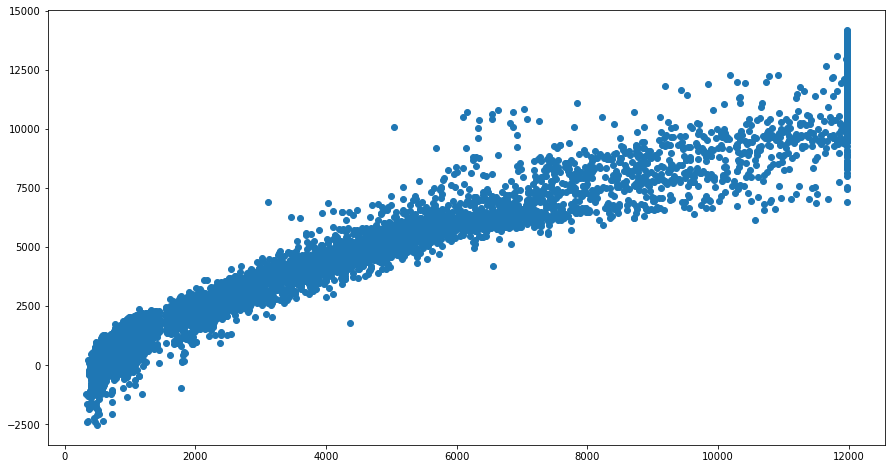

In [1520]:
plt.scatter(y_test['price'], y_pred)
plt.show()

In [1521]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-1846.12) * Intercept + (9126.94) * carat + (-15.01) * depth + (-18.59) * table + (-1190.28) * x + (837.36) * y + (-163.64) * z + (481.81) * cut_Good + (714.65) * cut_Ideal + (674.77) * cut_Premium + (606.9) * cut_VeryGood + (-181.91) * color_E + (-256.81) * color_F + (-429.38) * color_G + (-855.99) * color_H + (-1323.93) * color_I + (-1928.05) * color_J + (4004.01) * clarity_IF + (2519.92) * clarity_SI1 + (1684.46) * clarity_SI2 + (3342.57) * clarity_VS1 + (3039.93) * clarity_VS2 + (3772.3) * clarity_VVS1 + (3757.78) * clarity_VVS2 + 

In [1522]:
# How do we improve the model? the R^2 is .844, how do we improve it
# The indpendent attributes have different units and scales of measurement 
# It is always a good practice to scale all the dimensions using z scores or someother methode to address the problem of different scales 

In [1523]:
from scipy.stats import zscore

In [1524]:
X_train_scaled= X_train.apply(zscore)
X_test_scaled= X_test.apply(zscore)
y_train_scaled= y_train.apply(zscore)
y_test_scaled= y_test.apply(zscore)

In [1525]:
regression_model= LinearRegression()

In [1526]:
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [1527]:
for idx, col_name in enumerate(X_train_scaled.columns):
    print('The coefficient for {} is {}'.format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.2117469253238913
The coefficient for depth is -0.005243217380580612
The coefficient for table is -0.011549557496650922
The coefficient for x is -0.3853998299065226
The coefficient for y is 0.2692508651210291
The coefficient for z is -0.03278304297808926
The coefficient for cut_Good is 0.039587657605694215
The coefficient for cut_Ideal is 0.1010388992545651
The coefficient for cut_Premium is 0.08520047232417093
The coefficient for cut_Very Good is 0.07309010167622368
The coefficient for color_E is -0.02038427793544997
The coefficient for color_F is -0.02794191548455513
The coefficient for color_G is -0.0506867107896182
The coefficient for color_H is -0.08864222545929801
The coefficient for color_I is -0.11609453211081977
The coefficient for color_J is -0.12433036640961038
The coefficient for clarity_IF is 0.20491542177253302
The coefficient for clarity_SI1 is 0.3120813098370674
The coefficient for clarity_SI2 is 0.18277849052583134
The coefficient for clar

In [1528]:
intercept= regression_model.intercept_[0]
print('the intercept for the model is{}'.format(intercept))

the intercept for the model is-1.225652723677334e-16


In [1529]:
regression_model.score(X_train_scaled, y_train_scaled)

0.9402045565696221

In [1530]:
regression_model.score(X_test_scaled, y_test_scaled)

0.9416787896233193

In [1531]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train_scaled, y_train_scaled).predict(X_train_scaled)
np.sqrt(metrics.mean_squared_error(y_train_scaled,predicted_train))

0.2445310684358492

In [1532]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_test_scaled, y_test_scaled).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test_scaled,predicted_test))

0.6890410562827451

In [1533]:
mse= np.mean((regression_model.predict(X_test_scaled)-y_test_scaled)**2)

In [1534]:
import math

In [1535]:
math.sqrt(mse)

0.2399027528020345

In [1536]:
y_predict_scaled= regression_model.predict(X_test_scaled)

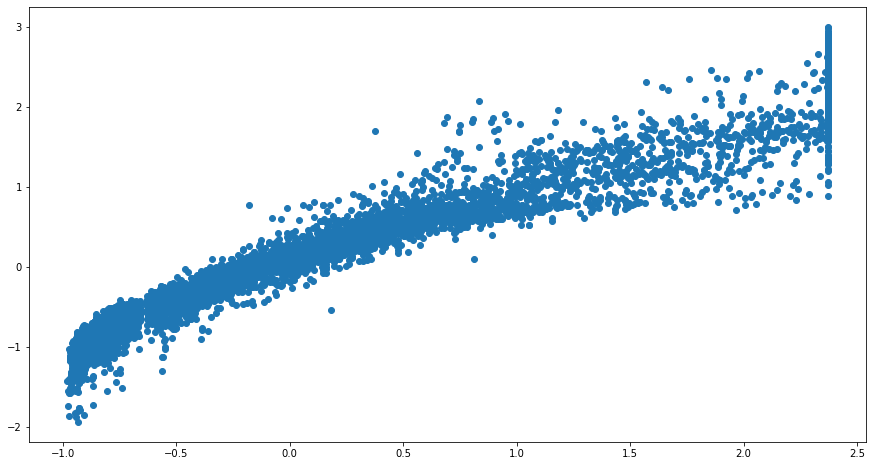

In [1537]:
plt.scatter(y_test_scaled['price'], y_predict_scaled)

In [1538]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1539]:
vif=[variance_inflation_factor(X.values, ix) for ix in range (X.shape[1])]

In [1540]:
i=0
for column in X.columns:
    if i < 23:
        print(column, '--', vif[i])
        i=i+1

carat -- 114.55442671614747
depth -- 1096.8639137485359
table -- 875.0164588070593
x -- 11747.641658012219
y -- 11282.005121351336
z -- 2020.238395036387
cut_Good -- 4.442510000122457
cut_Ideal -- 17.332329726936145
cut_Premium -- 10.600021453180316
cut_Very Good -- 9.818645458088376
color_E -- 2.480791743393058
color_F -- 2.4476494369532786
color_G -- 2.795792071051918
color_H -- 2.3052457256080086
color_I -- 1.931122578352752
color_J -- 1.5141766354336106
clarity_IF -- 3.629100226505269
clarity_SI1 -- 19.580205472282678
clarity_SI2 -- 13.746353924020983
clarity_VS1 -- 12.663234360103456
clarity_VS2 -- 18.332188142554365
clarity_VVS1 -- 6.386209173536363
clarity_VVS2 -- 8.32114204921759


### 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

#### Please refer to the business report for this question.

### Problem 2: Logistic Regression and LDA


### You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

### Dataset for Problem 2: Holiday_Package.csv

Data Dictionary:

Variable Name	Description
Holiday_Package :	 Opted for Holiday Package yes/no?

Salary 	: Employee salary

age 	: Age in years

edu 	: Years of formal education

no_young_children 	: The number of young children (younger than 7 years)

no_older_children 	: Number of older children

foreign 	: foreigner Yes/No

In [1541]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

### EDA

In [1542]:
dfhol= pd.read_csv('Holiday_Package-1.csv')

In [1543]:
dfhol.head(15)

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no
5,6,yes,61590,42,12,0,1,no
6,7,no,94344,51,8,0,0,no
7,8,yes,35987,32,8,0,2,no
8,9,no,41140,39,12,0,0,no
9,10,no,35826,43,11,0,2,no


In [1544]:
# drop the unnamed column as it is useless for the model
dfhol = dfhol.drop('Unnamed: 0', axis=1)

In [1545]:
dfhol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [1546]:
dfhol.shape

(872, 7)

### Checking for duplicates:

In [1547]:
dups = dfhol.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(dfhol.shape)

Number of duplicate rows = 0
(872, 7)


### Proportion in the Target classes:

In [1548]:
dfhol.Holliday_Package.value_counts(normalize=True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

In [1549]:
dfhol.describe()

,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,47729.172018,39.955275,9.307339,0.311927,0.982798
std,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000
max,236961.000000,62.000000,21.000000,3.000000,6.000000


### Checking for Missing values:

In [1550]:
dfhol.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [1551]:
dfhol.groupby(['Holliday_Package']).count()

,Salary,age,educ,no_young_children,no_older_children,foreign
Holliday_Package,,,,,,
no,471,471,471,471,471,471
yes,401,401,401,401,401,401


### Distribution of the variables Check:

In [1552]:
from pylab import rcParams

In [1553]:
rcParams['figure.figsize'] = 15,8

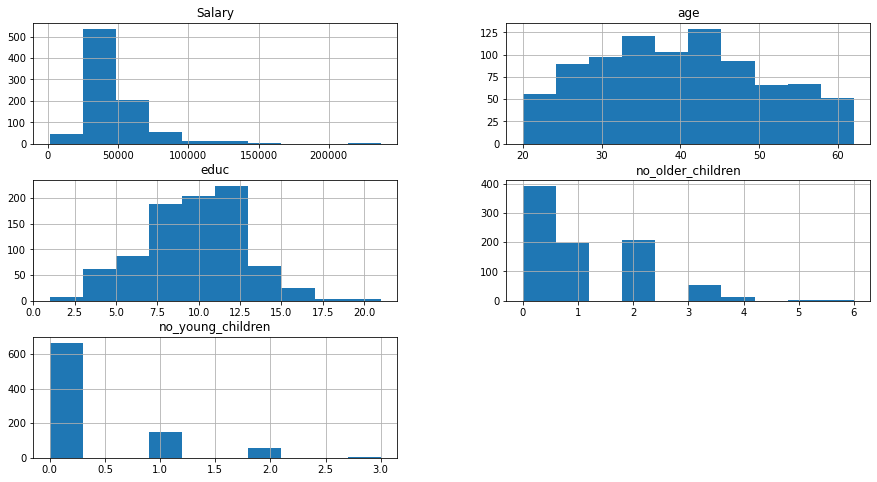

In [1554]:
dfhol[['foreign','Holliday_Package','Salary','age','educ','no_young_children','no_older_children']].hist();

### Salary against Holliday_Package:

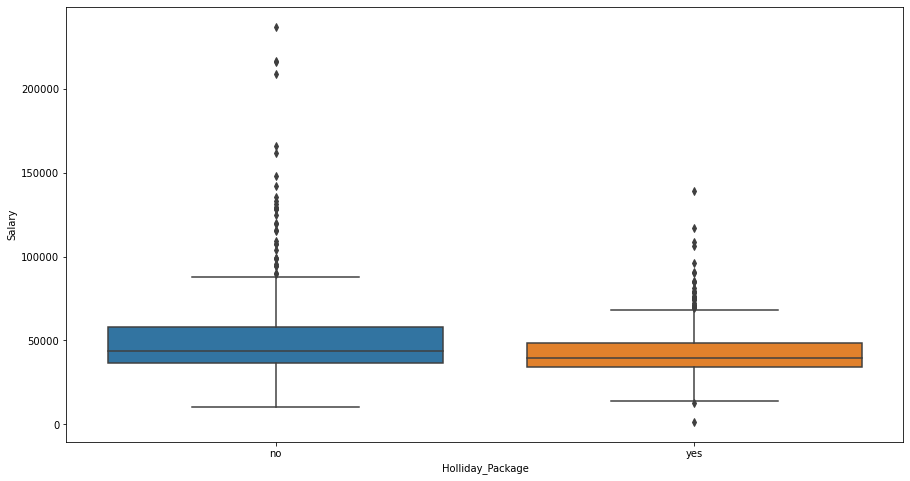

In [1555]:
sns.boxplot(dfhol['Holliday_Package'],dfhol['Salary']);

### age against Holliday_Package:

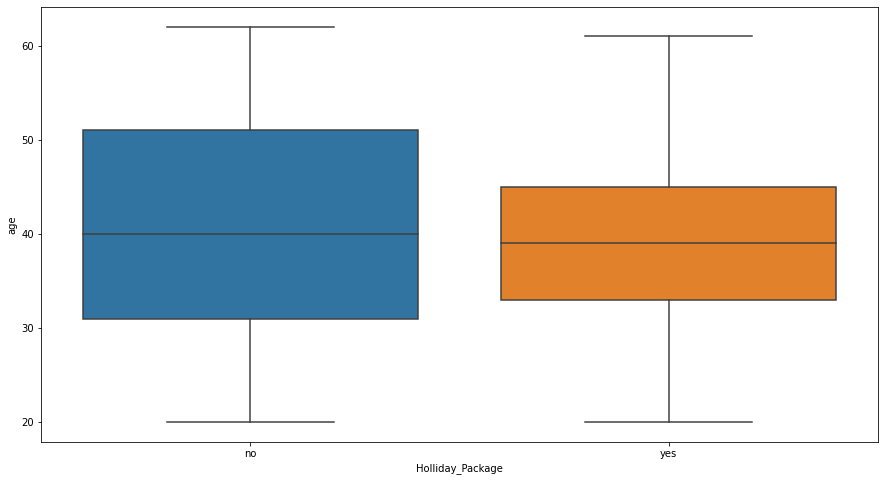

In [1556]:
sns.boxplot(dfhol['Holliday_Package'],dfhol['age']);

### educ against Holliday_Package:

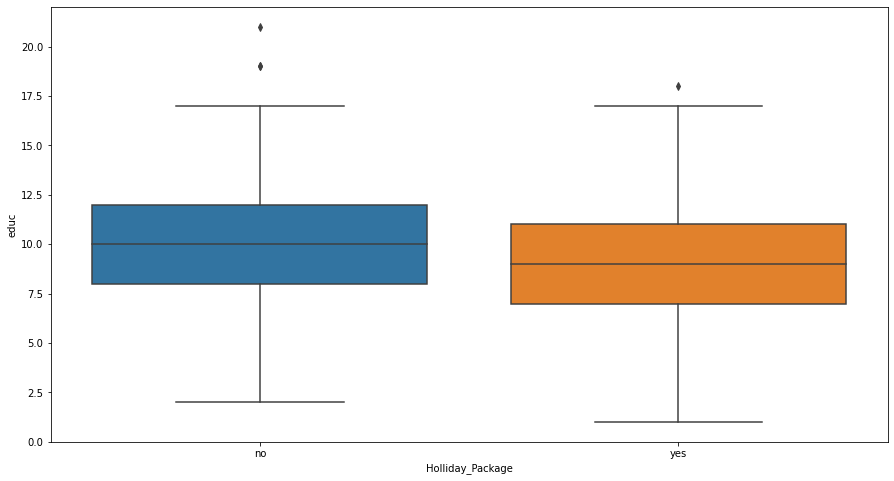

In [1557]:
sns.boxplot(dfhol['Holliday_Package'],dfhol['educ']);

### no_young_children against Holliday_Package:

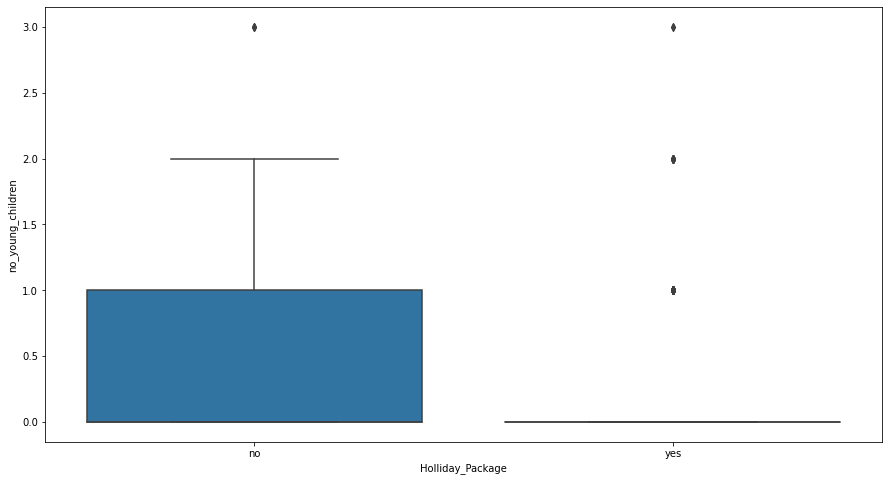

In [1558]:
sns.boxplot(dfhol['Holliday_Package'],dfhol['no_young_children']);

### no_older_children against Holliday_Package:

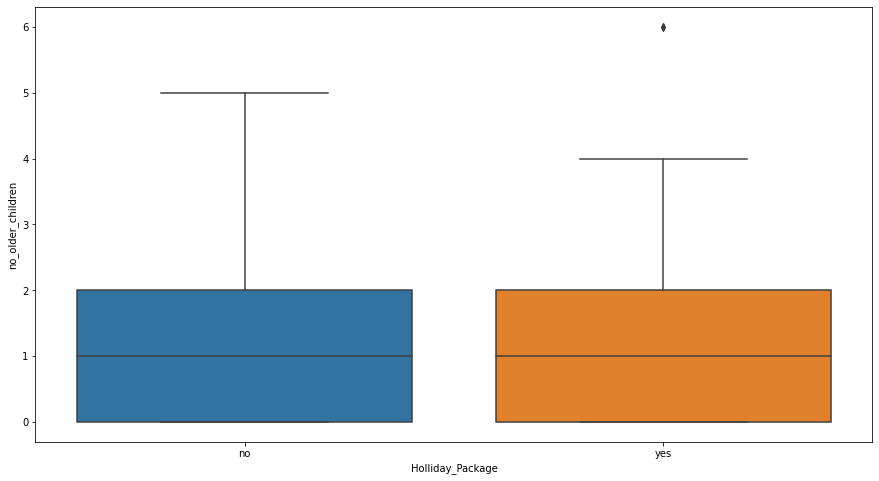

In [1559]:
sns.boxplot(dfhol['Holliday_Package'],dfhol['no_older_children']);

### foreign against Holliday_Package:

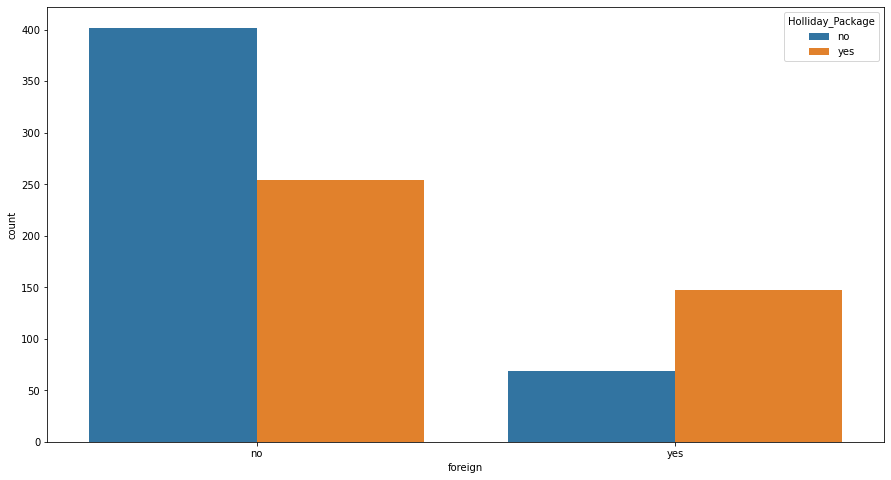

In [1560]:
sns.countplot(dfhol['foreign'],hue=dfhol['Holliday_Package']);

### no_young_children against Holliday_Package:

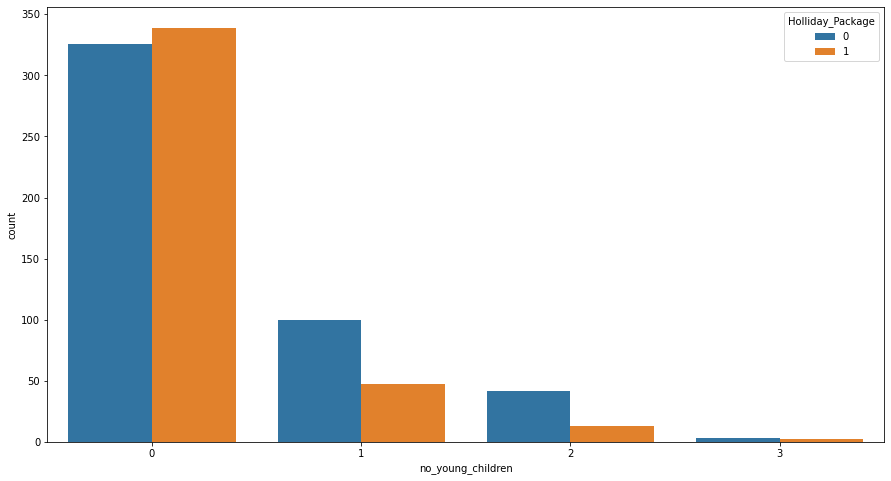

In [1620]:
sns.countplot(dfhol['no_young_children'],hue=dfhol['Holliday_Package']);

### Checking for Outliers:

### Checking the spread of the data using boxplot for the continuous variables:

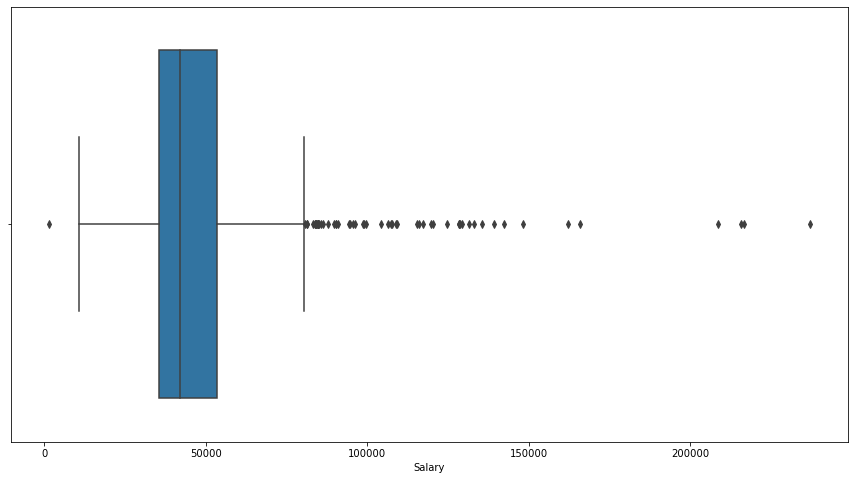

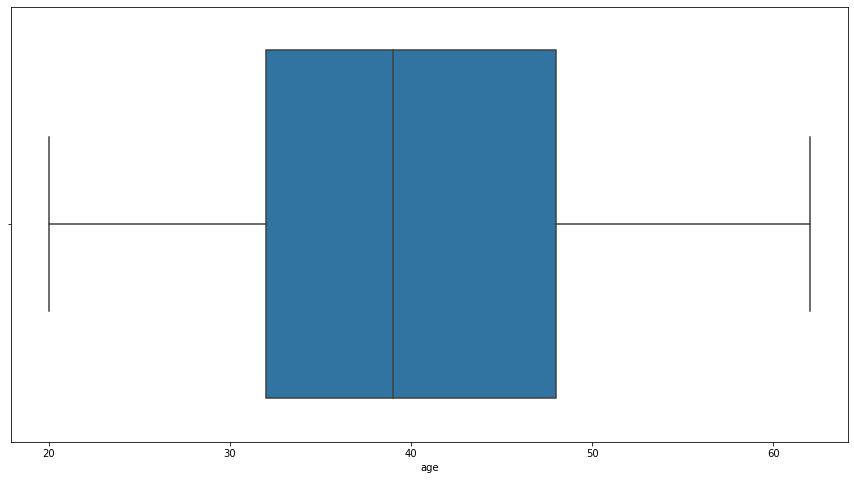

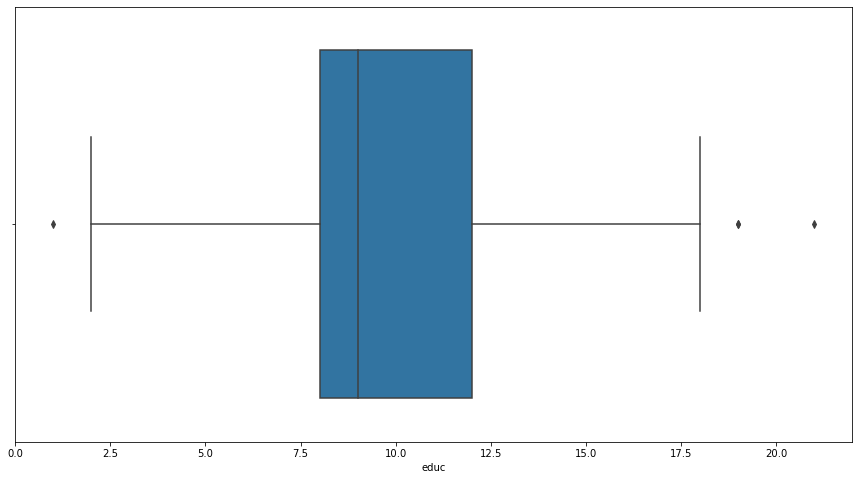

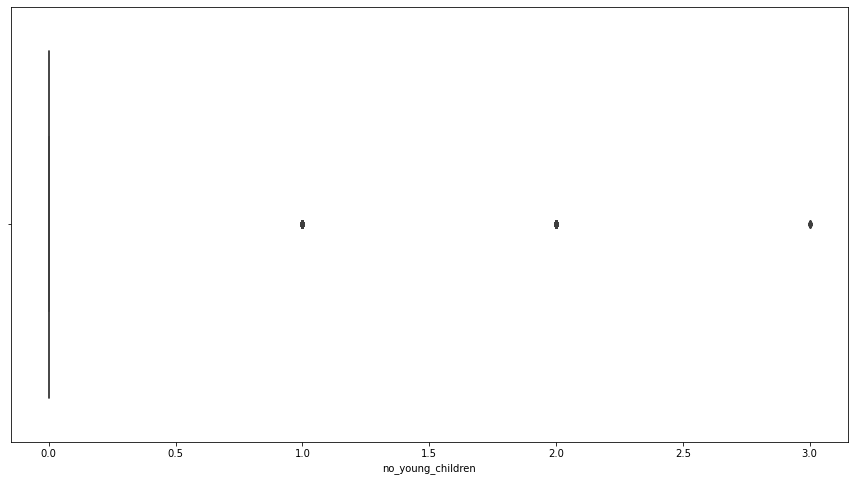

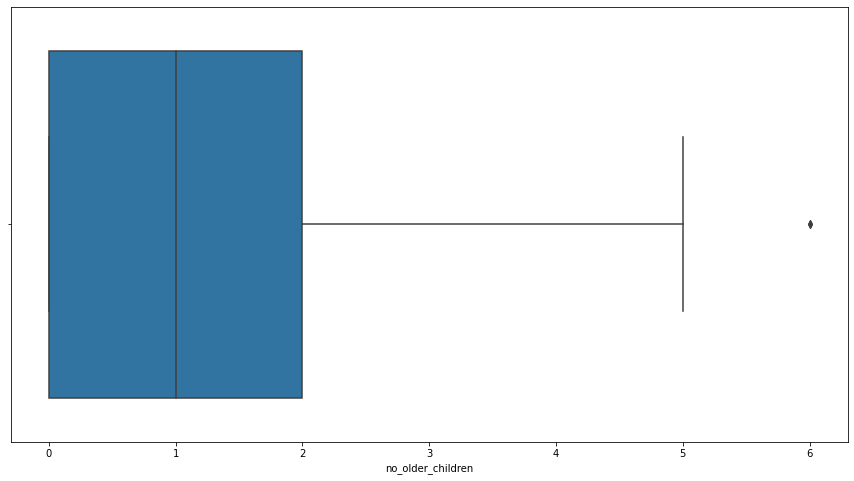

In [1563]:
cols = ['Salary','age','educ','no_young_children','no_older_children']
for i in cols:
    sns.boxplot(dfhol[i],whis=1.5)
    plt.show();

In [1564]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [1565]:
lr,ur=remove_outlier(dfhol['Salary'])
print('Lower Range :',lr,'\nUpper Range :',ur)
dfhol['Salary']=np.where(dfhol['Salary']>ur,ur,dfhol['Salary'])
dfhol['Salary']=np.where(dfhol['Salary']<lr,lr,dfhol['Salary'])

Lower Range : 8105.75 
Upper Range : 80687.75


In [1566]:
lr,ur=remove_outlier(dfhol['age'])
print('Lower Range :',lr,'\nUpper Range :',ur)
dfhol['age']=np.where(dfhol['age']>ur,ur,dfhol['age'])
dfhol['age']=np.where(dfhol['age']<lr,lr,dfhol['age'])

Lower Range : 8.0 
Upper Range : 72.0


In [1567]:
lr,ur=remove_outlier(dfhol['educ'])
print('Lower Range :',lr,'\nUpper Range :',ur)
dfhol['educ']=np.where(dfhol['educ']>ur,ur,dfhol['educ'])
dfhol['educ']=np.where(dfhol['educ']<lr,lr,dfhol['educ'])

Lower Range : 2.0 
Upper Range : 18.0


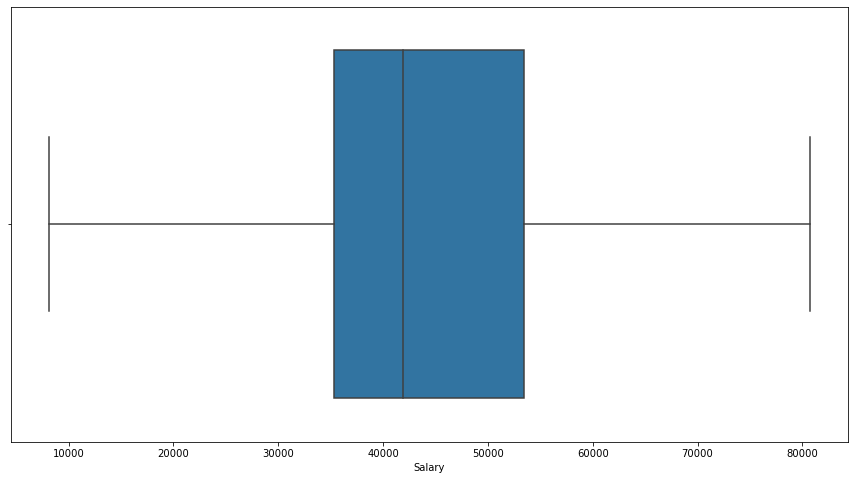

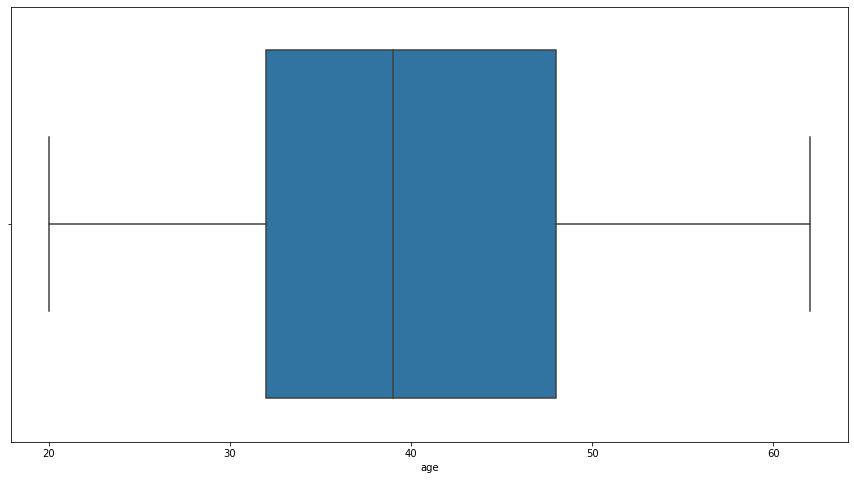

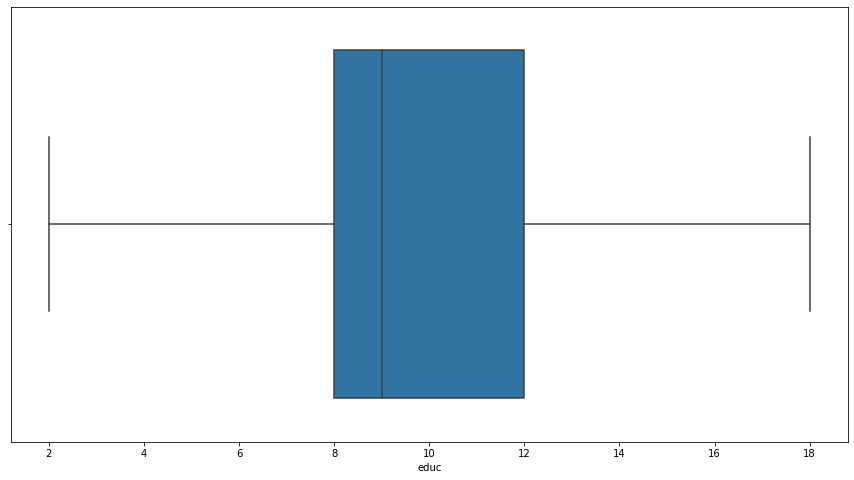

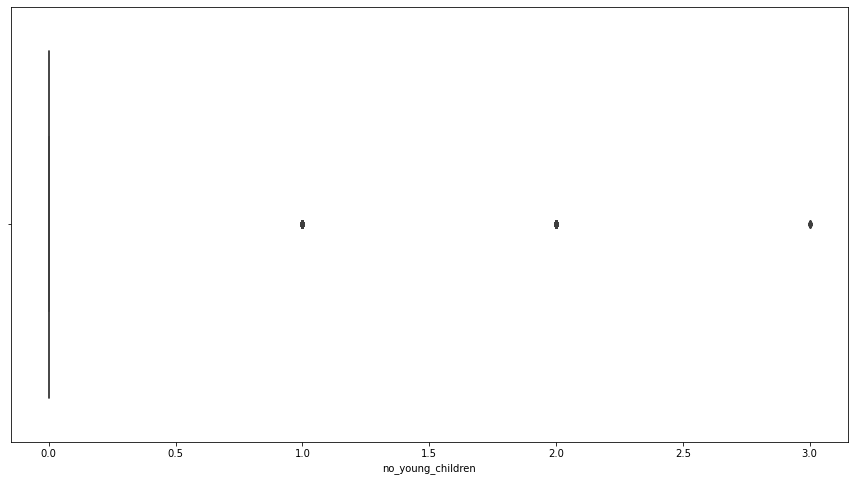

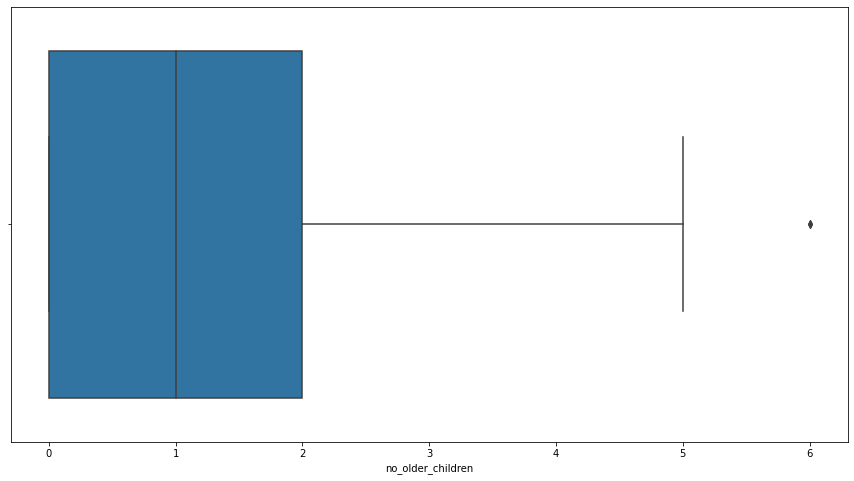

In [1568]:
cols = ['Salary','age','educ','no_young_children','no_older_children']
for i in cols:
    sns.boxplot(dfhol[i],whis=1.5)
    plt.show();

### Data distribution:

C:\Users\Sathyabanu\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


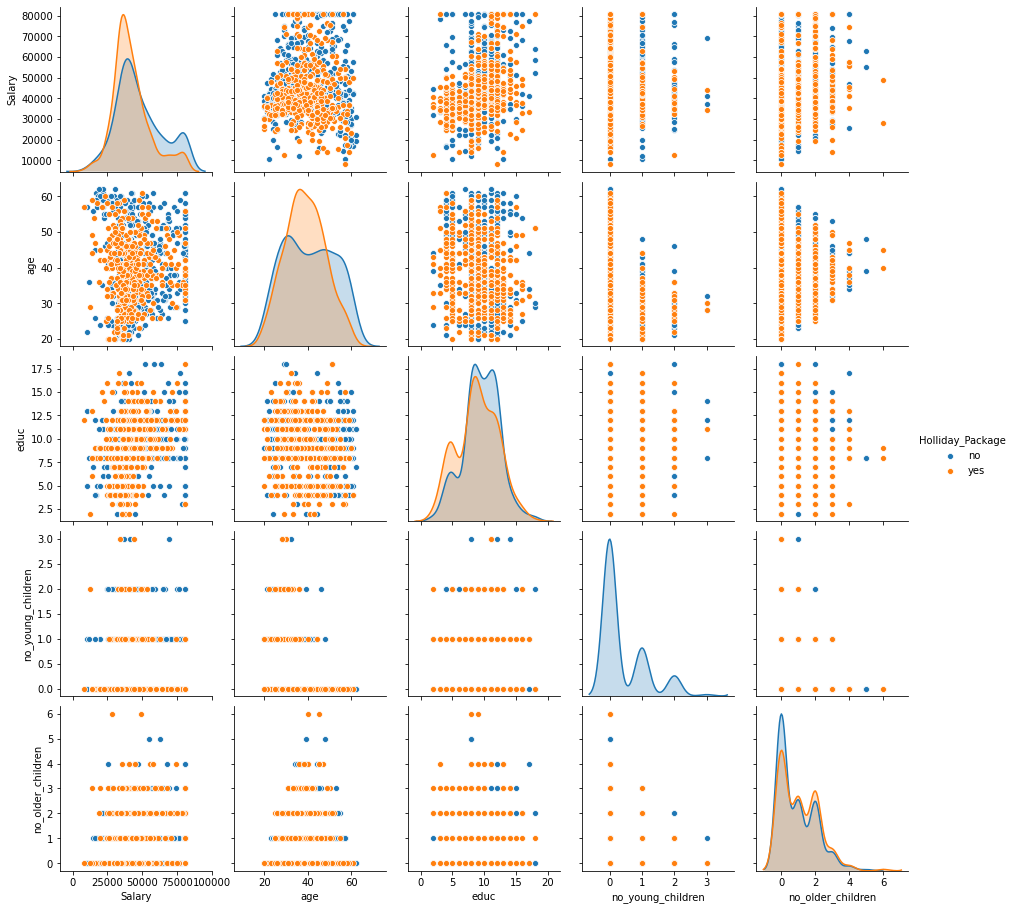

In [1569]:
sns.pairplot(dfhol, hue='Holliday_Package', diag_kind='kde')

### Checking for Correlations:

In [1570]:
dfhol.corr()

,Salary,age,educ,no_young_children,no_older_children
Salary,1.000000,0.047029,0.352913,-0.034360,0.121993
age,0.047029,1.000000,-0.149682,-0.519093,-0.116205
educ,0.352913,-0.149682,1.000000,0.097342,-0.035904
no_young_children,-0.034360,-0.519093,0.097342,1.000000,-0.238428
no_older_children,0.121993,-0.116205,-0.035904,-0.238428,1.000000


### Correlation plot:

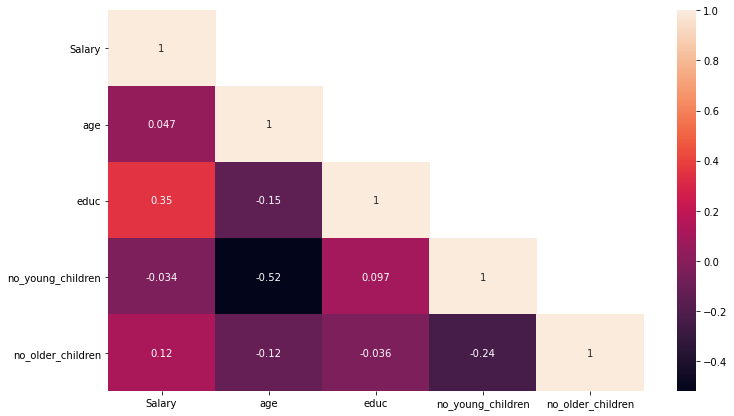

In [1571]:
plt.figure(figsize=(12,7))
sns.heatmap(dfhol.corr(), annot=True,mask=np.triu(dfhol.corr(),+1));

### Converting all objects to categorical codes:

In [1572]:
for feature in dfhol.columns: 
    if dfhol[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(dfhol[feature].unique()))
        print(pd.Categorical(dfhol[feature].unique()).codes)
        dfhol[feature] = pd.Categorical(dfhol[feature]).codes



feature: Holliday_Package
[no, yes]
Categories (2, object): [no, yes]
[0 1]


feature: foreign
[no, yes]
Categories (2, object): [no, yes]
[0 1]


In [1573]:
dfhol.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.0,30.0,8.0,1,1,0
1,1,37207.0,45.0,8.0,0,1,0
2,0,58022.0,46.0,9.0,0,0,0
3,0,66503.0,31.0,11.0,2,0,0
4,0,66734.0,44.0,12.0,0,2,0


### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

### Train Test Split:

In [1574]:
# Copy all the predictor variables into X dataframe
X = dfhol.drop('Holliday_Package', axis=1)

# Copy target into the y dataframe. 
y = dfhol['Holliday_Package']

In [1575]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [1576]:
y_train.value_counts(1)

0    0.539344
1    0.460656
Name: Holliday_Package, dtype: float64

In [1577]:
y_test.value_counts(1)

0    0.541985
1    0.458015
Name: Holliday_Package, dtype: float64

### Logistic Regression Model:

In [1578]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=100,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:  1.4min finished


LogisticRegression(n_jobs=2, penalty='none', solver='newton-cg', verbose=True)

### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

### Predicting on Training and Test dataset:

In [1579]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

### Getting the Predicted Classes and Probs:

In [1580]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.677959,0.322041
1,0.535239,0.464761
2,0.692009,0.307991
3,0.489946,0.510054
4,0.571862,0.428138


### Model Evaluation:

In [1581]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.6672131147540984

### AUC and ROC for the training data:

AUC: 0.733


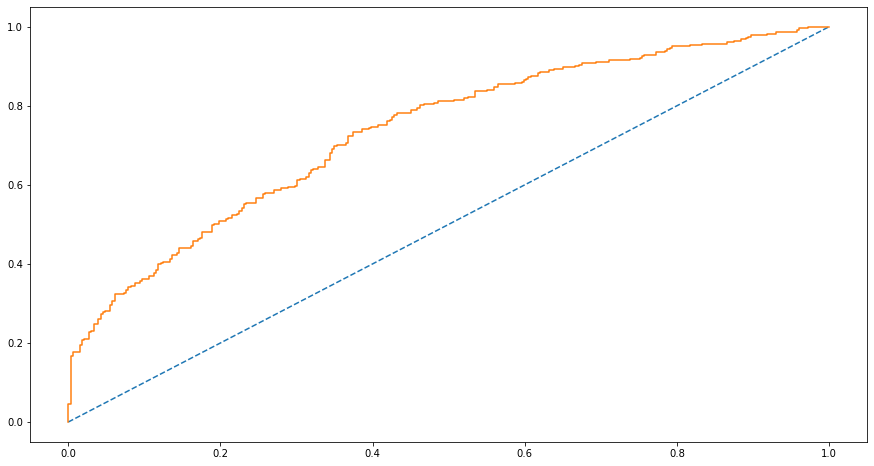

In [1582]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [1583]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.648854961832061

### AUC and ROC for the test data:

AUC: 0.733


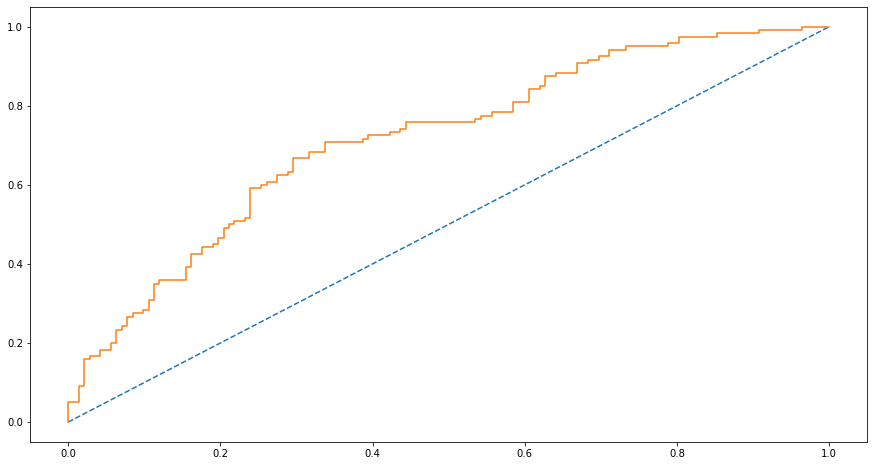

In [1584]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Confusion Matrix for the training data:

In [1585]:
confusion_matrix(y_train, ytrain_predict)

array([[244,  85],
       [118, 163]], dtype=int64)

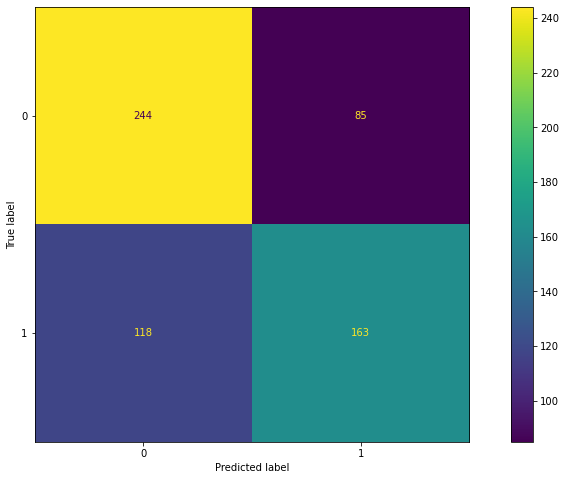

In [1586]:
plot_confusion_matrix(model,X_train,y_train);

In [1587]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610



### Confusion Matrix for test data:

In [1588]:
confusion_matrix(y_test, ytest_predict)

array([[108,  34],
       [ 58,  62]], dtype=int64)

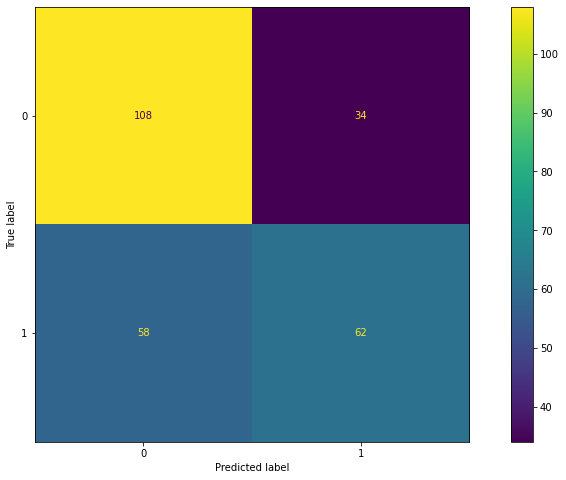

In [1589]:
plot_confusion_matrix(model,X_test,y_test);

In [1590]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262



### Applying GridSearchCV for Logistic Regression

In [1591]:
grid={'penalty':['l1','none'],
      'solver':['liblinear','lbfgs'],
      'tol':[0.01,0.001]}

In [1592]:
model = LogisticRegression(max_iter=100,n_jobs=2)

In [1593]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=2,scoring='f1')

In [1594]:
grid_search.fit(X_train, y_train)

C:\Users\Sathyabanu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


GridSearchCV(cv=3, estimator=LogisticRegression(n_jobs=2), n_jobs=2,
             param_grid={'penalty': ['l1', 'none'],
                         'solver': ['liblinear', 'lbfgs'],
                         'tol': [0.01, 0.001]},
             scoring='f1')

In [1595]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.001} 

LogisticRegression(n_jobs=2, penalty='l1', solver='liblinear', tol=0.001)


In [1596]:
best_model = grid_search.best_estimator_

In [1597]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [1598]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.657991,0.342009
1,0.632453,0.367547
2,0.670240,0.329760
3,0.584370,0.415630
4,0.554644,0.445356


              precision    recall  f1-score   support

           0       0.66      0.77      0.71       329
           1       0.66      0.54      0.59       281

    accuracy                           0.66       610
   macro avg       0.66      0.65      0.65       610
weighted avg       0.66      0.66      0.66       610
 



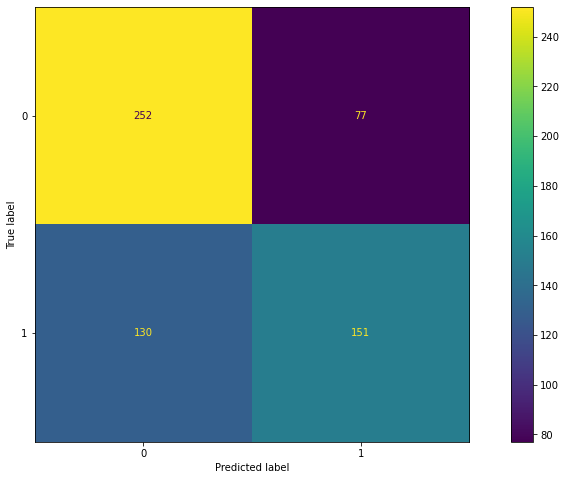

In [1599]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.66      0.80      0.72       142
           1       0.68      0.51      0.58       120

    accuracy                           0.66       262
   macro avg       0.67      0.65      0.65       262
weighted avg       0.67      0.66      0.66       262
 



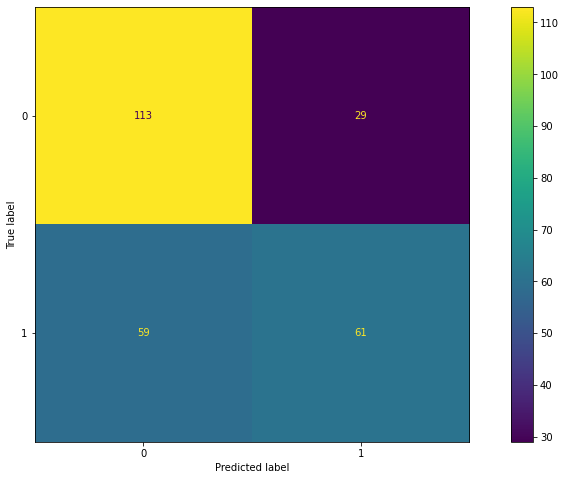

In [1600]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

In [1601]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).(contd.,)

### Train (70%) - Test (30%) Split

In [1602]:
# Creating a copy of the original data frame
df = dfhol.copy()

In [1603]:
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.0,30.0,8.0,1,1,0
1,1,37207.0,45.0,8.0,0,1,0
2,0,58022.0,46.0,9.0,0,0,0
3,0,66503.0,31.0,11.0,2,0,0
4,0,66734.0,44.0,12.0,0,2,0


In [1604]:
dfhol.head(15)

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.00,30.0,8.0,1,1,0
1,1,37207.00,45.0,8.0,0,1,0
2,0,58022.00,46.0,9.0,0,0,0
3,0,66503.00,31.0,11.0,2,0,0
4,0,66734.00,44.0,12.0,0,2,0
5,1,61590.00,42.0,12.0,0,1,0
6,0,80687.75,51.0,8.0,0,0,0
7,1,35987.00,32.0,8.0,0,2,0
8,0,41140.00,39.0,12.0,0,0,0
9,0,35826.00,43.0,11.0,0,2,0


In [1605]:
X = df.drop('Holliday_Package',axis=1)
Y = df.pop('Holliday_Package')

In [1606]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.30,random_state=1,stratify = Y)

In [1607]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',Y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',Y_test.shape)

Number of rows and columns of the training set for the independent variables: (610, 6)
Number of rows and columns of the training set for the dependent variable: (610,)
Number of rows and columns of the test set for the independent variables: (262, 6)
Number of rows and columns of the test set for the dependent variable: (262,)


### LDA model:

In [1608]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.(contd.,)

### Prediction:

In [1609]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

### Training Data and Test Data Confusion Matrix Comparison:

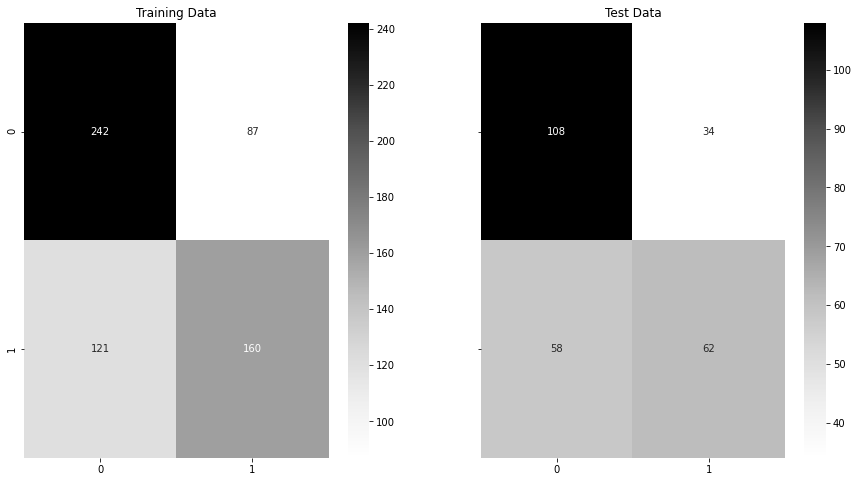

In [1610]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


### Training Data and Test Data Classification Report Comparison:

In [1611]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.57      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.65      0.65       610
weighted avg       0.66      0.66      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262
 



### Probability prediction for training and testing data:

In [1612]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [1613]:
pred_prob_train[:,1]

array([0.73551768, 0.28353533, 0.39649058, 0.75922189, 0.47003003,
       0.40177036, 0.36986276, 0.3046299 , 0.60482453, 0.64266073,
       0.23173951, 0.25792362, 0.35900888, 0.04498625, 0.2829094 ,
       0.3643531 , 0.54782489, 0.30634075, 0.58914069, 0.6607117 ,
       0.62795172, 0.26530773, 0.88138953, 0.33411259, 0.08664023,
       0.8271775 , 0.19379564, 0.75733957, 0.53209164, 0.1892203 ,
       0.29258073, 0.3384893 , 0.3769479 , 0.38097484, 0.31056554,
       0.29449197, 0.10973564, 0.56147758, 0.48217964, 0.19474058,
       0.22634057, 0.7985467 , 0.50039742, 0.73794034, 0.7904354 ,
       0.3690023 , 0.30262021, 0.93345931, 0.43331819, 0.72155301,
       0.71677925, 0.45274194, 0.78744639, 0.37233837, 0.19187097,
       0.74091501, 0.25003165, 0.51612541, 0.67432724, 0.35616917,
       0.61002822, 0.52758233, 0.52261599, 0.40993742, 0.57008809,
       0.61654303, 0.12380369, 0.56372873, 0.40105364, 0.27636387,
       0.331064  , 0.74844526, 0.77913611, 0.21862757, 0.44518

AUC for the Training Data: 0.731
AUC for the Test Data: 0.713


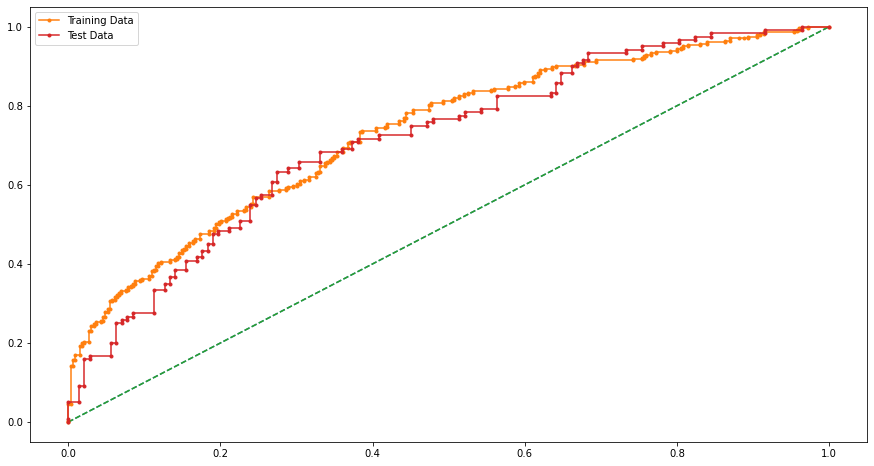

In [1614]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Changing the cut off values for maximum accuracy:

0.1 

Accuracy Score 0.4738
F1 Score 0.6356 

Confusion Matrix


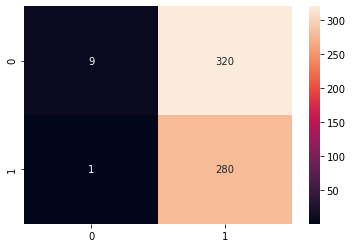

0.2 

Accuracy Score 0.523
F1 Score 0.6498 

Confusion Matrix


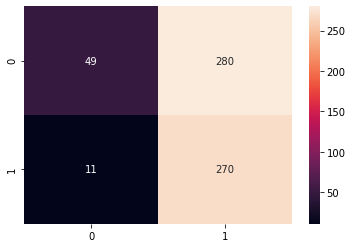

0.3 

Accuracy Score 0.6066
F1 Score 0.6774 

Confusion Matrix


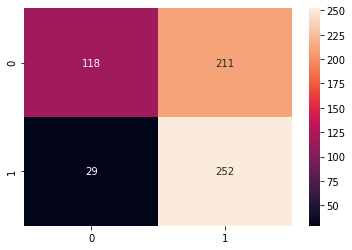

0.4 

Accuracy Score 0.6607
F1 Score 0.6667 

Confusion Matrix


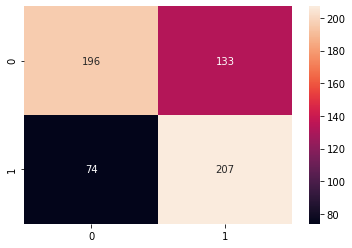

0.5 

Accuracy Score 0.659
F1 Score 0.6061 

Confusion Matrix


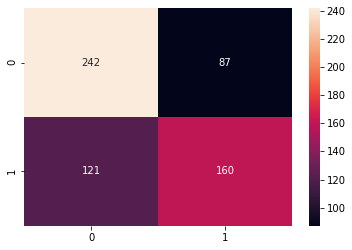

0.6 

Accuracy Score 0.6525
F1 Score 0.5225 

Confusion Matrix


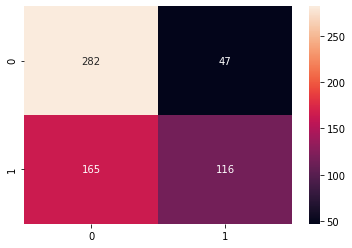

0.7 

Accuracy Score 0.6443
F1 Score 0.4304 

Confusion Matrix


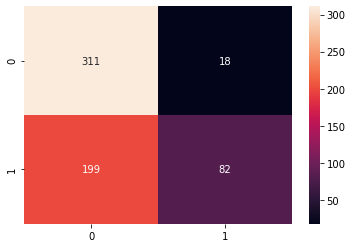

0.8 

Accuracy Score 0.5902
F1 Score 0.2038 

Confusion Matrix


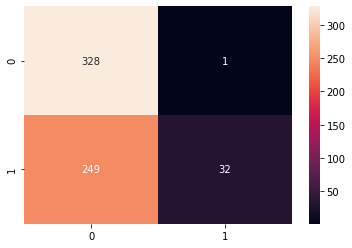

0.9 

Accuracy Score 0.5426
F1 Score 0.0141 

Confusion Matrix


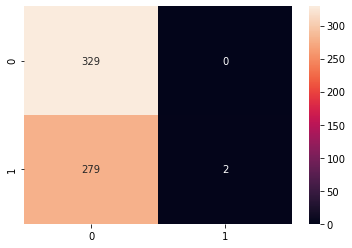

In [1615]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(Y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(Y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(Y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(Y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [1616]:
#Predicting the classes on the test data

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.3:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

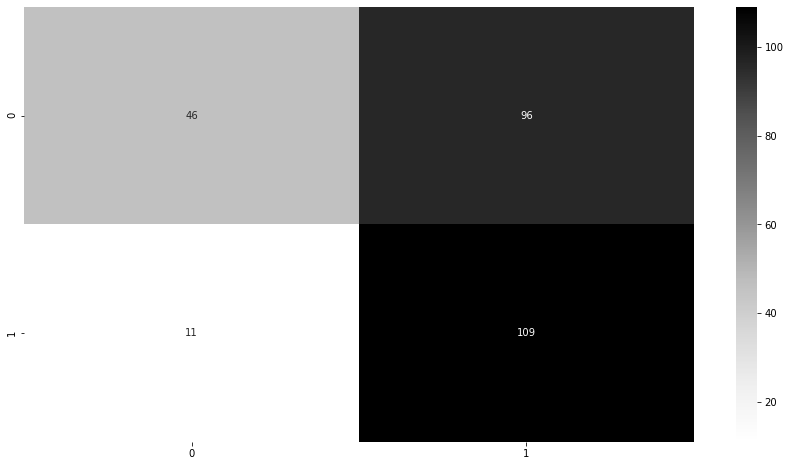

In [1617]:
sns.heatmap((metrics.confusion_matrix(Y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Greys');

In [1618]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(Y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.81      0.32      0.46       142
           1       0.53      0.91      0.67       120

    accuracy                           0.59       262
   macro avg       0.67      0.62      0.57       262
weighted avg       0.68      0.59      0.56       262
 



### 2.4 Inference: Basis on these predictions, what are the insights and recommendations.

#### please refer to the business report for this question.